## Kalman Filtering


In [1]:
import Simulator
import Observation
import Statistics
#import ETKalmanFilter

### Definition of forward model

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators



In [2]:
grid = Simulator.Grid(nx=50,ny=30,dx=0.1,dy=0.1)
simulator = Simulator.Simulator(grid, D=0.25, v=[1,0])

### Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
import numpy as np

def prior(grid, phi):
    """
    Constructing a Matern-type covariance prior with Matern-parameter phi
    where the matrix is normalized with the standard deviation
    """
    # INPUT! Bell mean
    mean = 0.0*np.ones(grid.N_x)
    # INPUT! Constant var
    var  = 1.0*np.ones(grid.N_x)

    # Matern covariance
    dist_mat = np.copy(grid.dist_mat)
    cov = (1+phi*dist_mat)*np.exp(-phi*dist_mat)
    
    # Normalisation
    var_mesh = np.meshgrid(np.sqrt(var),np.sqrt(var))[0]*np.meshgrid(np.sqrt(var),np.sqrt(var))[1]    

    return mean, var_mesh, cov

Please remember to set priors!


c:\Users\florianb\Documents\advectionDiffusion\Ensemble.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  self.ensemble = np.random.multivariate_normal(mean, cov + nugget*np.eye(self.simulator.grid.N_x), self.N_e).transpose()


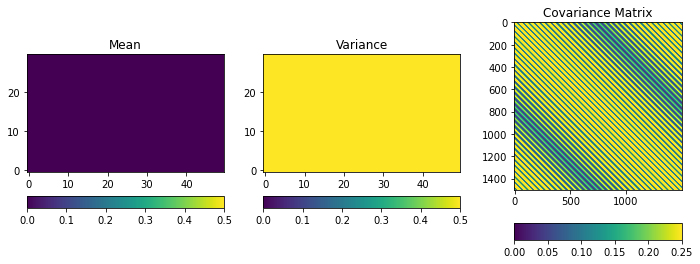

In [4]:
statistics = Statistics.Statistics(simulator, 500)
mean, var_mesh, cov = prior(grid=grid, phi=2.0)
statistics.set(mean, var_mesh*cov)
statistics.plot()

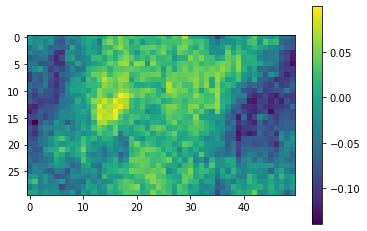

In [5]:
from matplotlib import pyplot as plt 

mean = np.average(statistics.ensemble.ensemble, axis=1)

plt.imshow(np.reshape(mean, (grid.ny, grid.nx)))
plt.colorbar()

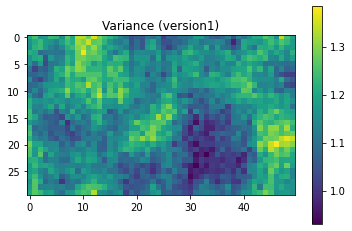

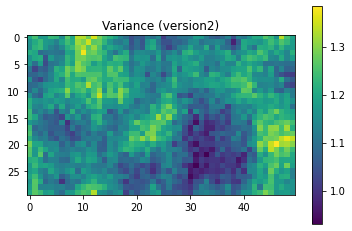

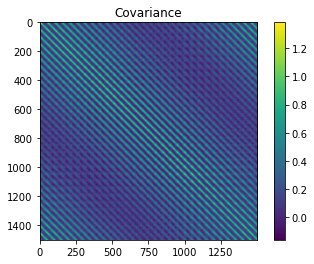

In [6]:
var = np.zeros_like(mean)
for e in range(statistics.ensemble.N_e):
    var = var + 1/(statistics.ensemble.N_e-1) * (statistics.ensemble.ensemble[:,e] - mean)**2

plt.figure()
plt.title("Variance (version1)")
plt.imshow(np.reshape(var, (grid.ny, grid.nx)))
plt.colorbar()

cov = 1/(statistics.ensemble.N_e-1)*(statistics.ensemble.ensemble - np.reshape(mean, (grid.N_x,1))) @ (statistics.ensemble.ensemble - np.reshape(mean, (grid.N_x,1))).transpose()

plt.figure()
plt.title("Variance (version2)")
plt.imshow(np.reshape(np.diag(cov), (grid.ny, grid.nx)))
plt.colorbar()

plt.figure()
plt.title("Covariance")
plt.imshow(cov)
plt.colorbar()

### Setting observation moorings

In [7]:
import numpy as np

def observation_positions(grid, freq=10):
    poses = []
    for j in range(int(np.floor(grid.ny/freq))):
        for i in range(int(np.floor(grid.nx/freq))):
            poses.append([i*freq,j*freq])
    return poses


In [8]:
observation = Observation.Observation(simulator)


Remember to set observation positions and to set values!


In [9]:
poses = observation_positions(grid, freq=10)
observation.set_positions(poses)

In [10]:
observation.load_observations("observations.txt")

### Temporal evolution of model

In [11]:
etkFilter = ETKalmanFilter.ETKF(statistics, observation)

for t in range(observation.N_obs):
    print(t)
    statistics.propagate(25)
    kalmanFilter.filter(statistics.mean, statistics.cov, observation.obses[t])
    statistics.plot()

NameError: name 'ETKalmanFilter' is not defined